In [372]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns 
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import researchpy as rp
import warnings
warnings.filterwarnings('ignore')

In [373]:
diabetes = pd.read_csv('diabetes2.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [374]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [375]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [376]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [377]:
print("The amount of 0 in Glucose", diabetes['Glucose'].isin([0]).sum())
print("The amount of 0 in Blood Pressure", diabetes['BloodPressure'].isin([0]).sum())
print("The amount of 0 in Insulin", diabetes['Insulin'].isin([0]).sum())
print("The amount of 0 in Skin Thickness", diabetes['SkinThickness'].isin([0]).sum())
print("The amount of 0 in BMI", diabetes['BMI'].isin([0]).sum())

The amount of 0 in Glucose 5
The amount of 0 in Blood Pressure 35
The amount of 0 in Insulin 374
The amount of 0 in Skin Thickness 227
The amount of 0 in BMI 11


In [378]:
diabetes_extra = diabetes.copy()

In [379]:
diabetes_extra['Glucose'] = diabetes_extra['Glucose'].replace(0, diabetes_extra['Glucose'].mean())
diabetes_extra['BloodPressure'] = diabetes_extra['BloodPressure'].replace(0, diabetes_extra['BloodPressure'].mean())
diabetes_extra['Insulin'] = diabetes_extra['Insulin'].replace(0, diabetes_extra['Insulin'].mean())
diabetes_extra['SkinThickness'] = diabetes_extra['SkinThickness'].replace(0, diabetes_extra['SkinThickness'].mean())
diabetes_extra['BMI'] = diabetes_extra['BMI'].replace(0, diabetes_extra['BMI'].mean())

diabetes_extra

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [380]:
diabetes_extra['Pregnancies'].values[diabetes_extra['Pregnancies'] > 0] = 1
diabetes_extra

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,1,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,1,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,1,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,1,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [381]:
diabetes_extra.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.855469,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,0.351857,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,1.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,1.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [382]:
diabetes_extra.to_csv('diabetes_extra.csv')

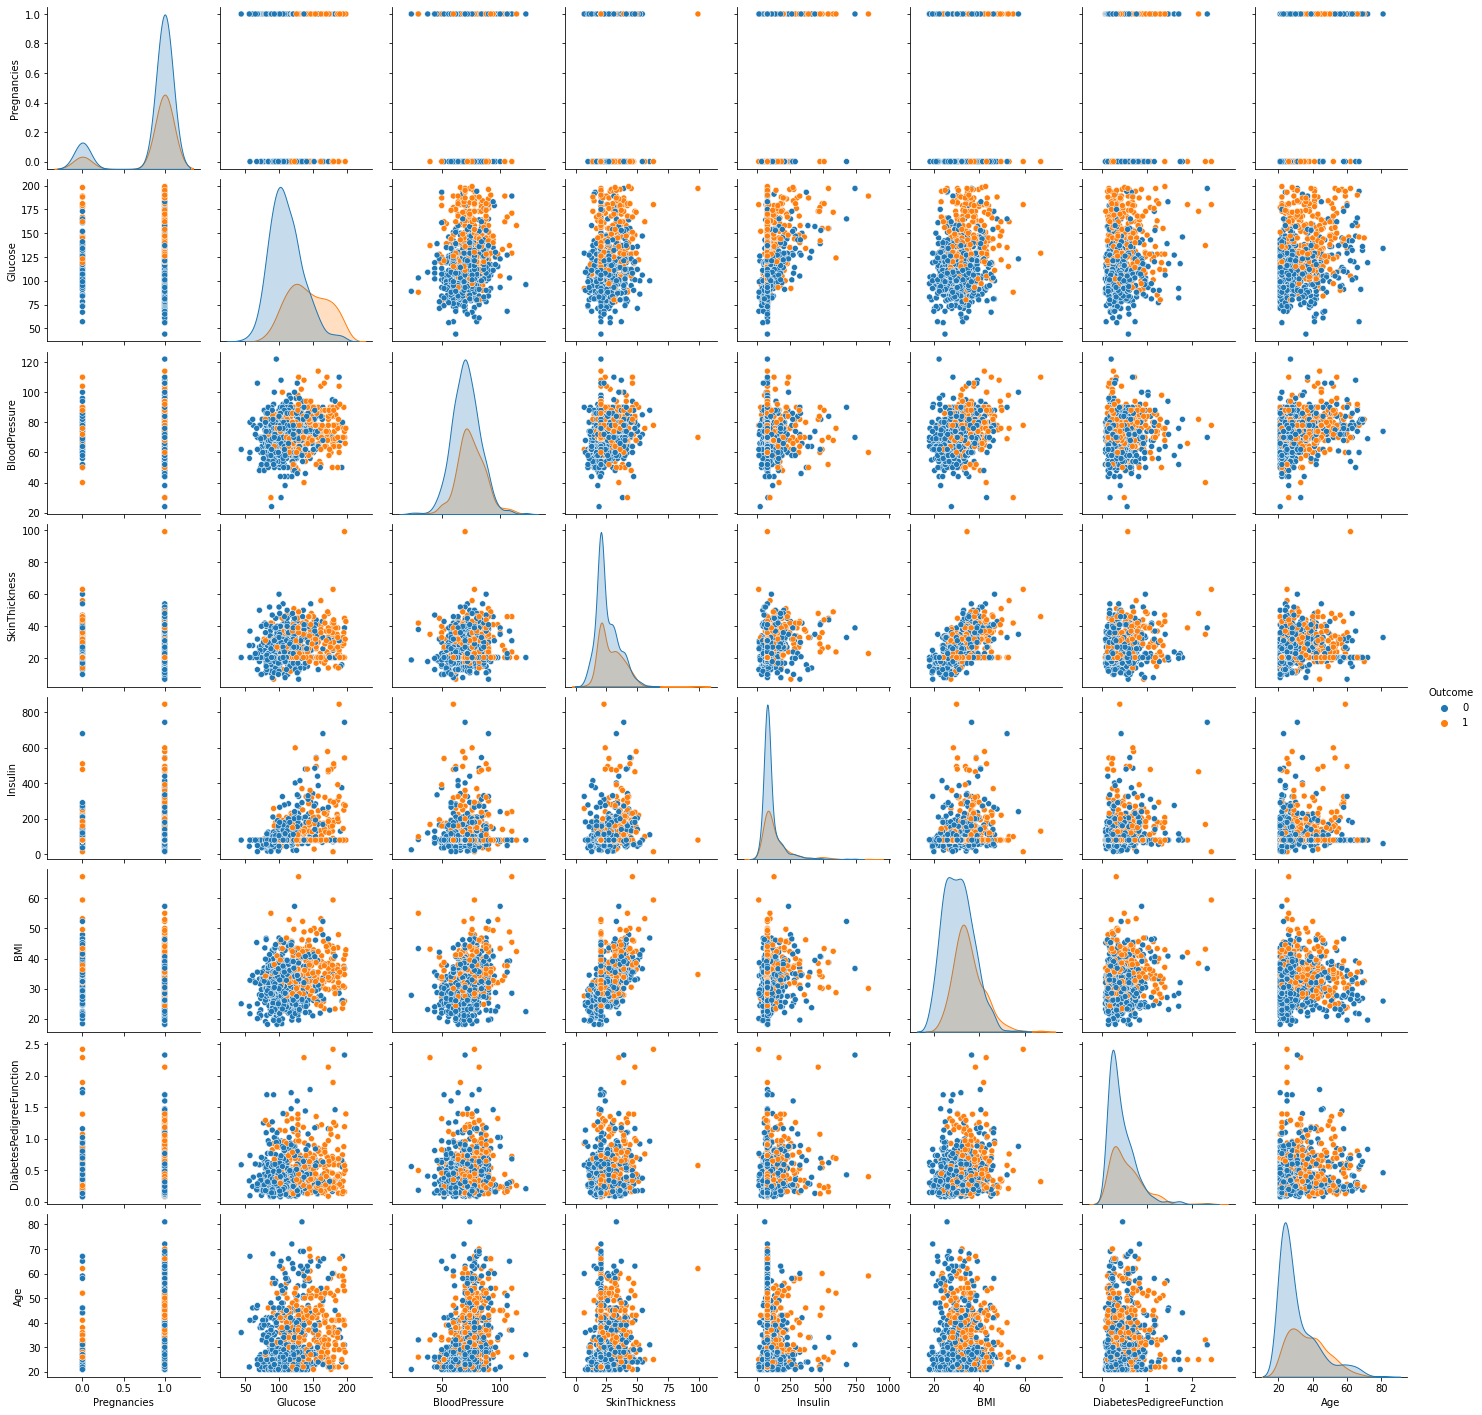

In [383]:
sns.pairplot(diabetes_extra, diag_kind='kde', hue='Outcome'); 

In [384]:
diabetes_extra['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [385]:
diabetes_extra['Pregnancies'].value_counts()

1    657
0    111
Name: Pregnancies, dtype: int64

34.89583333333333


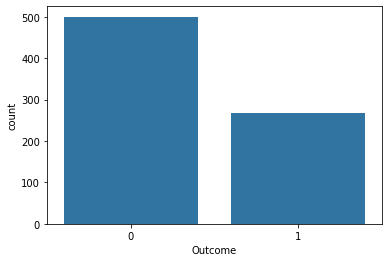

In [386]:
PercentDiabetes = (268/768)*100
print(PercentDiabetes)
base_color = sns.color_palette()[0]
sns.countplot(data = diabetes_extra, x = 'Outcome', color = base_color);

plt.figure(figsize = [10, 10])
sns.heatmap(diabetes_extra.corr(), annot = True, cmap = 'vlag_r', center = 0);

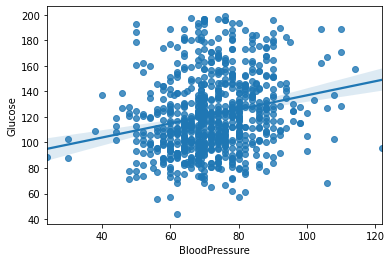

In [387]:
sns.regplot(data=diabetes_extra, x='BloodPressure', y='Glucose')
plt.xlabel('BloodPressure')
plt.ylabel('Glucose');

###  (a) Blood Pressure

diabetes_extra.groupby("Outcome").agg({"BloodPressure":[np.mean, np.std, np.size]})

In [388]:
BP_diabetes_mean = 74.950
BP_diabetes_std = 12.016
BP_diabetes_n = 268
BP_diabetes_se = BP_diabetes_std / np.sqrt(BP_diabetes_n) 

BP_diabetes_lcb = BP_diabetes_mean - 1.96* BP_diabetes_se  
BP_diabetes_ucb = BP_diabetes_mean + 1.96* BP_diabetes_se 

BP_nondiabetes_mean = 70.810
BP_nondiabetes_std = 11.932
BP_nondiabetes_n = 500
BP_nondiabetes_se = BP_nondiabetes_std / np.sqrt(BP_nondiabetes_n) 

BP_nondiabetes_lcb = BP_nondiabetes_mean - 1.96* BP_nondiabetes_se  
BP_nondiabetes_ucb = BP_nondiabetes_mean + 1.96* BP_nondiabetes_se 

In [389]:
print("Blood Pressure diabetes patients LCB: %.3f" % BP_diabetes_lcb)
print("Blood Pressure diabetes patients UCB: %.3f" % BP_diabetes_ucb)

print()
print("Blood Pressure non-diabetes patients LCB: %.3f" % BP_nondiabetes_lcb)
print("Blood Pressure non-diabetes patients UCB: %.3f" % BP_nondiabetes_ucb)

Blood Pressure diabetes patients LCB: 73.511
Blood Pressure diabetes patients UCB: 76.389

Blood Pressure non-diabetes patients LCB: 69.764
Blood Pressure non-diabetes patients UCB: 71.856


In [390]:
Blood_Pressure = diabetes_extra[['BloodPressure', 'Outcome']]

In [391]:
Blood_Pressure["Outcome"].replace({1: "Diabetic", 0: "NonDiabetic"}, inplace=True)
Blood_Pressure

,BloodPressure,Outcome
0,72.0,Diabetic
1,66.0,NonDiabetic
2,64.0,Diabetic
3,66.0,NonDiabetic
4,40.0,Diabetic
...,...,...
763,76.0,NonDiabetic
764,70.0,NonDiabetic
765,72.0,NonDiabetic
766,60.0,Diabetic


In [392]:
rp.ttest(group1= Blood_Pressure['BloodPressure'][Blood_Pressure['Outcome'] == 'Diabetic'], group1_name= "Diabetic",
         group2= Blood_Pressure['BloodPressure'][Blood_Pressure['Outcome'] == 'NonDiabetic'], group2_name= "NonDiabetic")

(      Variable      N       Mean         SD        SE  95% Conf.   Interval
 0     Diabetic  268.0  74.950326  12.016572  0.734029  73.505105  76.395548
 1  NonDiabetic  500.0  70.810008  11.932269  0.533627  69.761575  71.858441
 2     combined  768.0  72.254807  12.115932  0.437196  71.396564  73.113049,
                        Independent t-test   results
 0  Difference (Diabetic - NonDiabetic) =     4.1403
 1                   Degrees of freedom =   766.0000
 2                                    t =     4.5721
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     0.3461
 7                            Hedge's g =     0.3458
 8                        Glass's delta =     0.3446
 9                          Pearson's r =     0.1630)

In [393]:
stats.ttest_ind(Blood_Pressure['BloodPressure'][Blood_Pressure['Outcome'] == 'Diabetic'],
                  Blood_Pressure['BloodPressure'][Blood_Pressure['Outcome'] == 'NonDiabetic'])

Ttest_indResult(statistic=4.5720594159921255, pvalue=5.629657191349956e-06)

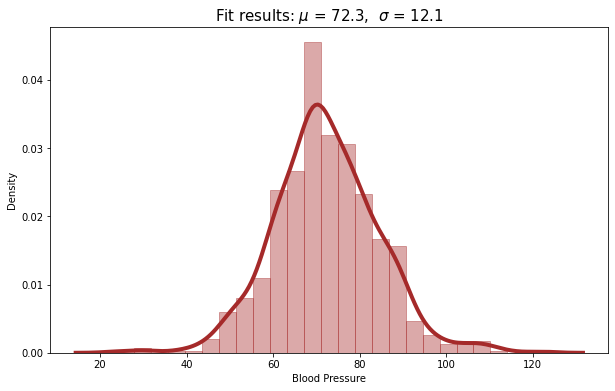

In [394]:
mu, std = norm.fit(Blood_Pressure['BloodPressure'])
plt.figure(figsize = [10, 6])
sns.distplot(Blood_Pressure['BloodPressure'], hist=True, kde=True, 
             bins=25, color = 'brown', 
             hist_kws={'edgecolor':'brown'},
             kde_kws={'linewidth': 4});
plt.title("Fit results: $\mu$ = %.1f,  $\sigma$ = %.1f" % (mu, std), size=15)
plt.xlabel("Blood Pressure")
plt.ylabel("Density");

### (b) Insulin

In [395]:
diabetes_extra.groupby("Outcome").agg({"Insulin":[np.mean, np.std, np.size]})

Insulin                   
               mean         std   size
Outcome                               
0        106.457354   78.561997  500.0
1        141.426597  112.047153  268.0

In [396]:
Insulin_diabetes_mean = 141.4276
Insulin_diabetes_std = 112.047
Insulin_diabetes_n = 268
Insulin_diabetes_se = Insulin_diabetes_std / np.sqrt(Insulin_diabetes_n) 

Insulin_diabetes_lcb = Insulin_diabetes_mean - 1.96* Insulin_diabetes_se  
Insulin_diabetes_ucb = Insulin_diabetes_mean + 1.96* Insulin_diabetes_se 

Insulin_nondiabetes_mean = 106.457
Insulin_nondiabetes_std = 78.561
Insulin_nondiabetes_n = 500
Insulin_nondiabetes_se = Insulin_nondiabetes_std / np.sqrt(Insulin_nondiabetes_n) 

Insulin_nondiabetes_lcb = Insulin_nondiabetes_mean - 1.96* Insulin_nondiabetes_se  
Insulin_nondiabetes_ucb = Insulin_nondiabetes_mean + 1.96* Insulin_nondiabetes_se 

In [397]:
print("Insulin diabetes patients LCB: %.3f" % Insulin_diabetes_lcb)
print("Insulin diabetes patients UCB: %.3f" % Insulin_diabetes_ucb)
print()

print("Insulin Pressure non-diabetes patients LCB: %.3f" % Insulin_nondiabetes_lcb)
print("Insulin non-diabetes patients UCB: %.3f" % Insulin_nondiabetes_ucb)

Insulin diabetes patients LCB: 128.013
Insulin diabetes patients UCB: 154.843

Insulin Pressure non-diabetes patients LCB: 99.571
Insulin non-diabetes patients UCB: 113.343


In [398]:
Insulin = diabetes_extra[['Insulin', 'Outcome']]

In [399]:
Insulin["Outcome"].replace({1: "Diabetic", 0: "NonDiabetic"}, inplace=True)
Insulin

,Insulin,Outcome
0,79.799479,Diabetic
1,79.799479,NonDiabetic
2,79.799479,Diabetic
3,94.000000,NonDiabetic
4,168.000000,Diabetic
...,...,...
763,180.000000,NonDiabetic
764,79.799479,NonDiabetic
765,112.000000,NonDiabetic
766,79.799479,Diabetic


In [400]:
rp.ttest(group1= Insulin['Insulin'][Insulin['Outcome'] == 'Diabetic'], group1_name= "Diabetic",
         group2= Insulin['Insulin'][Insulin['Outcome'] == 'NonDiabetic'], group2_name= "NonDiabetic")

(      Variable      N        Mean          SD        SE   95% Conf.  \
 0     Diabetic  268.0  141.426597  112.047153  6.844369  127.950797   
 1  NonDiabetic  500.0  106.457354   78.561997  3.513399   99.554475   
 2     combined  768.0  118.660163   93.080358  3.358748  112.066733   
 
      Interval  
 0  154.902398  
 1  113.360233  
 2  125.253593  ,
                        Independent t-test   results
 0  Difference (Diabetic - NonDiabetic) =    34.9692
 1                   Degrees of freedom =   766.0000
 2                                    t =     5.0408
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     0.3816
 7                            Hedge's g =     0.3812
 8                        Glass's delta =     0.3121
 9                          Pearson's r =     0.1792)

In [401]:
stats.ttest_ind(Insulin['Insulin'][Insulin['Outcome'] == 'Diabetic'],
          Insulin['Insulin'][Insulin['Outcome'] == 'NonDiabetic'])

Ttest_indResult(statistic=5.040842054458567, pvalue=5.788429897832881e-07)

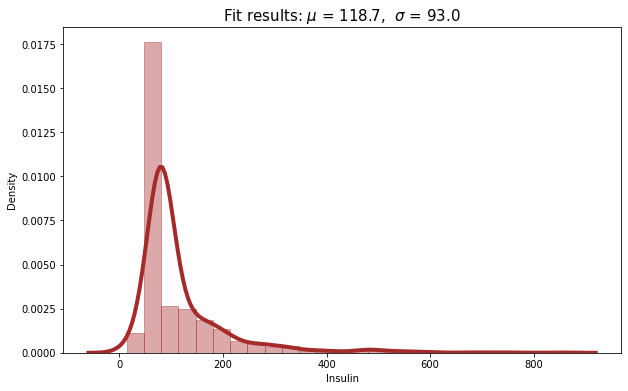

In [402]:
mu, std = norm.fit(Insulin['Insulin'])
plt.figure(figsize = [10, 6])
sns.distplot(Insulin['Insulin'], hist=True, kde=True, 
             bins=25, color = 'brown', 
             hist_kws={'edgecolor':'brown'},
             kde_kws={'linewidth': 4});
plt.title("Fit results: $\mu$ = %.1f,  $\sigma$ = %.1f" % (mu, std), size=15)
plt.xlabel("Insulin")
plt.ylabel("Density");

### (c) BMI

In [403]:
diabetes_extra.groupby("Outcome").agg({"BMI":[np.mean, np.std, np.size]})

BMI                 
              mean       std   size
Outcome                            
0        30.880066  6.503051  500.0
1        35.381288  6.596733  268.0

In [404]:
BMI_diabetes_mean = 141.4276
BMI_diabetes_std = 112.047
BMI_diabetes_n = 268
BMI_diabetes_se = BMI_diabetes_std / np.sqrt(BMI_diabetes_n) 

BMI_diabetes_lcb = BMI_diabetes_mean - 1.96* BMI_diabetes_se  
BMI_diabetes_ucb =BMI_diabetes_mean + 1.96* BMI_diabetes_se 

BMI_nondiabetes_mean = 106.457
BMI_nondiabetes_std = 78.561
BMI_nondiabetes_n = 500
BMI_nondiabetes_se = BMI_nondiabetes_std / np.sqrt(BMI_nondiabetes_n) 

BMI_nondiabetes_lcb = BMI_nondiabetes_mean - 1.96* BMI_nondiabetes_se  
BMI_nondiabetes_ucb = BMI_nondiabetes_mean + 1.96* BMI_nondiabetes_se 

In [405]:
print("BMI diabetes patients LCB: %.3f" % BP_diabetes_lcb)
print("BMI diabetes patients UCB: %.3f" % BP_diabetes_ucb)
print()

print("BMI Pressure non-diabetes patients LCB: %.3f" % Insulin_nondiabetes_lcb)
print("BMI non-diabetes patients UCB: %.3f" % Insulin_nondiabetes_ucb)

BMI diabetes patients LCB: 73.511
BMI diabetes patients UCB: 76.389

BMI Pressure non-diabetes patients LCB: 99.571
BMI non-diabetes patients UCB: 113.343


In [406]:
BMI = diabetes_extra[['BMI', 'Outcome']]

In [407]:
BMI["Outcome"].replace({1: "Diabetic", 0: "NonDiabetic"}, inplace=True)
BMI

,BMI,Outcome
0,33.6,Diabetic
1,26.6,NonDiabetic
2,23.3,Diabetic
3,28.1,NonDiabetic
4,43.1,Diabetic
...,...,...
763,32.9,NonDiabetic
764,36.8,NonDiabetic
765,26.2,NonDiabetic
766,30.1,Diabetic


In [408]:
rp.ttest(group1= BMI['BMI'][BMI['Outcome'] == 'Diabetic'], group1_name= "Diabetic",
         group2= BMI['BMI'][BMI['Outcome'] == 'NonDiabetic'], group2_name= "NonDiabetic")

(      Variable      N       Mean        SD        SE  95% Conf.   Interval
 0     Diabetic  268.0  35.381288  6.596733  0.402960  34.587905  36.174670
 1  NonDiabetic  500.0  30.880066  6.503051  0.290825  30.308673  31.451459
 2     combined  768.0  32.450805  6.875374  0.248094  31.963782  32.937828,
                        Independent t-test   results
 0  Difference (Diabetic - NonDiabetic) =     4.5012
 1                   Degrees of freedom =   766.0000
 2                                    t =     9.0970
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     0.6887
 7                            Hedge's g =     0.6880
 8                        Glass's delta =     0.6823
 9                          Pearson's r =     0.3123)

In [409]:
stats.ttest_ind(BMI['BMI'][BMI['Outcome'] == 'Diabetic'],
         BMI['BMI'][BMI['Outcome'] == 'NonDiabetic'])

Ttest_indResult(statistic=9.09702964503362, pvalue=7.868367931282461e-19)

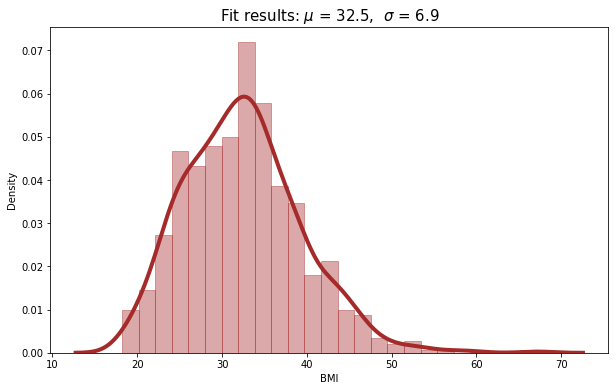

In [410]:
mu, std = norm.fit(BMI['BMI'])
plt.figure(figsize = [10, 6])
sns.distplot(BMI['BMI'], hist=True, kde=True, 
             bins=25, color = 'brown', 
             hist_kws={'edgecolor':'brown'},
             kde_kws={'linewidth': 4});
plt.title("Fit results: $\mu$ = %.1f,  $\sigma$ = %.1f" % (mu, std), size=15)
plt.xlabel("BMI")
plt.ylabel("Density");

 ### (d)  	SkinThickness

In [411]:
diabetes_extra.groupby("Outcome").agg({"SkinThickness":[np.mean, np.std, np.size]})

SkinThickness                  
                 mean        std   size
Outcome                                
0           25.373135   9.030644  500.0
1           28.907494  10.290405  268.0

In [412]:
ST_diabetes_mean = 28.907
ST_diabetes_std = 10.290
ST_diabetes_n = 268
ST_diabetes_se = ST_diabetes_std / np.sqrt(ST_diabetes_n) 

ST_diabetes_lcb = ST_diabetes_mean - 1.96* ST_diabetes_se  
ST_diabetes_ucb = ST_diabetes_mean + 1.96* ST_diabetes_se 

ST_nondiabetes_mean = 106.457
ST_nondiabetes_std = 78.561
ST_nondiabetes_n = 500
ST_nondiabetes_se = ST_nondiabetes_std / np.sqrt(ST_nondiabetes_n) 

ST_nondiabetes_lcb = ST_nondiabetes_mean - 1.96* ST_nondiabetes_se  
ST_nondiabetes_ucb = ST_nondiabetes_mean + 1.96* ST_nondiabetes_se 

In [413]:
print("ST diabetes patients LCB: %.3f" % ST_diabetes_lcb)
print("ST diabetes patients UCB: %.3f" % ST_diabetes_ucb)
print()

print("ST Pressure non-diabetes patients LCB: %.2f" % ST_nondiabetes_lcb)
print("ST non-diabetes patients UCB: %.3f" % ST_nondiabetes_ucb)

ST diabetes patients LCB: 27.675
ST diabetes patients UCB: 30.139

ST Pressure non-diabetes patients LCB: 99.57
ST non-diabetes patients UCB: 113.343


In [414]:
ST = diabetes_extra[['SkinThickness', 'Outcome']]

In [415]:
ST["Outcome"].replace({1: "Diabetic", 0: "NonDiabetic"}, inplace=True)
ST

,SkinThickness,Outcome
0,35.000000,Diabetic
1,29.000000,NonDiabetic
2,20.536458,Diabetic
3,23.000000,NonDiabetic
4,35.000000,Diabetic
...,...,...
763,48.000000,NonDiabetic
764,27.000000,NonDiabetic
765,23.000000,NonDiabetic
766,20.536458,Diabetic


In [416]:
rp.ttest(group1= ST['SkinThickness'][ST['Outcome'] == 'Diabetic'], group1_name= "Diabetic",
         group2= ST['SkinThickness'][ST['Outcome'] == 'NonDiabetic'], group2_name= "NonDiabetic")

(      Variable      N       Mean         SD        SE  95% Conf.   Interval
 0     Diabetic  268.0  28.907494  10.290405  0.628587  27.669877  30.145111
 1  NonDiabetic  500.0  25.373135   9.030644  0.403863  24.579655  26.166616
 2     combined  768.0  26.606479   9.631241  0.347537  25.924242  27.288717,
                        Independent t-test   results
 0  Difference (Diabetic - NonDiabetic) =     3.5344
 1                   Degrees of freedom =   766.0000
 2                                    t =     4.9201
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     0.3725
 7                            Hedge's g =     0.3721
 8                        Glass's delta =     0.3435
 9                          Pearson's r =     0.1750)

In [417]:
stats.ttest_ind(ST['SkinThickness'][ST['Outcome'] == 'Diabetic'],
         ST['SkinThickness'][ST['Outcome'] == 'NonDiabetic'])

Ttest_indResult(statistic=4.920089066364796, pvalue=1.0593515094342926e-06)

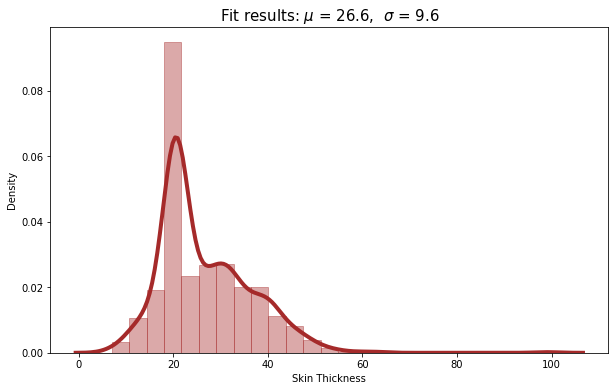

In [418]:
mu, std = norm.fit(ST['SkinThickness'])
plt.figure(figsize = [10, 6])
sns.distplot(ST['SkinThickness'], hist=True, kde=True, 
             bins=25, color = 'brown', 
             hist_kws={'edgecolor':'brown'},
             kde_kws={'linewidth': 4});
plt.title("Fit results: $\mu$ = %.1f,  $\sigma$ = %.1f" % (mu, std), size=15)
plt.xlabel("Skin Thickness")
plt.ylabel("Density");

 ### (e)  	Glucose

In [419]:
diabetes_extra.groupby("Outcome").agg({"Glucose":[np.mean, np.std, np.size]})

Glucose                  
               mean        std   size
Outcome                              
0        110.705367  24.715021  500.0
1        142.159661  29.545943  268.0

In [420]:
Glucose_diabetes_mean = 28.907
Glucose_diabetes_std = 10.290
Glucose_diabetes_n = 268
Glucose_diabetes_se = Glucose_diabetes_std / np.sqrt(Glucose_diabetes_n) 

Glucose_diabetes_lcb = Glucose_diabetes_mean - 1.96* Glucose_diabetes_se  
Glucose_diabetes_ucb = Glucose_diabetes_mean + 1.96* Glucose_diabetes_se 

Glucose_nondiabetes_mean = 106.457
Glucose_nondiabetes_std = 78.561
Glucose_nondiabetes_n = 500
Glucose_nondiabetes_se = Glucose_nondiabetes_std / np.sqrt(Glucose_nondiabetes_n) 

Glucose_nondiabetes_lcb = Glucose_nondiabetes_mean - 1.96* Glucose_nondiabetes_se  
Glucose_nondiabetes_ucb = Glucose_nondiabetes_mean + 1.96* Glucose_nondiabetes_se 

In [421]:
print("Glucose diabetes patients LCB: %.3f" % Glucose_diabetes_lcb)
print("Glucose diabetes patients UCB: %.3f" % Glucose_diabetes_ucb)
print()

print("Glucose Pressure non-diabetes patients LCB: %.2f" % Glucose_nondiabetes_lcb)
print("Glucose non-diabetes patients UCB: %.3f" % Glucose_nondiabetes_ucb)

Glucose diabetes patients LCB: 27.675
Glucose diabetes patients UCB: 30.139

Glucose Pressure non-diabetes patients LCB: 99.57
Glucose non-diabetes patients UCB: 113.343


In [422]:
Glucose = diabetes_extra[['Glucose', 'Outcome']]

In [423]:
Glucose['Outcome'].replace({1:"Diabetic", 0:"NonDiabetic"}, inplace=True)
Glucose

,Glucose,Outcome
0,148.0,Diabetic
1,85.0,NonDiabetic
2,183.0,Diabetic
3,89.0,NonDiabetic
4,137.0,Diabetic
...,...,...
763,101.0,NonDiabetic
764,122.0,NonDiabetic
765,121.0,NonDiabetic
766,126.0,Diabetic


In [424]:
rp.ttest(group1= Glucose['Glucose'][Glucose['Outcome'] == 'Diabetic'], group1_name= "Diabetic",
         group2= Glucose['Glucose'][Glucose['Outcome'] == 'NonDiabetic'], group2_name= "NonDiabetic")

(      Variable      N        Mean         SD        SE   95% Conf.    Interval
 0     Diabetic  268.0  142.159661  29.545943  1.804806  138.606199  145.713122
 1  NonDiabetic  500.0  110.705367  24.715021  1.105289  108.533773  112.876962
 2     combined  768.0  121.681605  30.436016  1.098265  119.525643  123.837567,
                        Independent t-test   results
 0  Difference (Diabetic - NonDiabetic) =    31.4543
 1                   Degrees of freedom =   766.0000
 2                                    t =    15.6791
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     1.1870
 7                            Hedge's g =     1.1858
 8                        Glass's delta =     1.0646
 9                          Pearson's r =     0.4929)

In [425]:
stats.ttest_ind(Glucose['Glucose'][Glucose['Outcome'] == 'Diabetic'],
               Glucose['Glucose'][Glucose['Outcome'] == 'NonDiabetic'])

Ttest_indResult(statistic=15.679089773875148, pvalue=2.9374175087328164e-48)

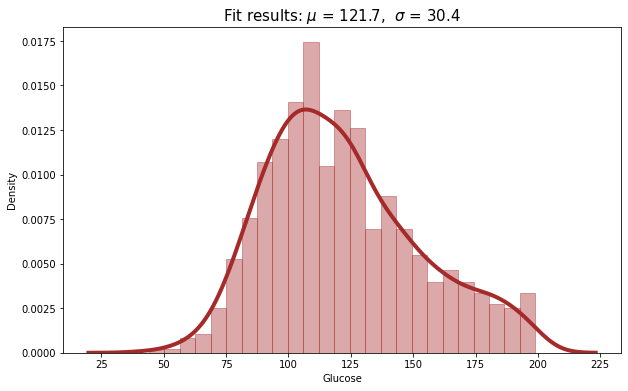

In [426]:
mu, std = norm.fit(Glucose['Glucose'])
plt.figure(figsize = [10, 6])
sns.distplot(Glucose['Glucose'], hist=True, kde=True, 
             bins=25, color = 'brown', 
             hist_kws={'edgecolor':'brown'},
             kde_kws={'linewidth': 4});
plt.title("Fit results: $\mu$ = %.1f,  $\sigma$ = %.1f" % (mu, std), size=15)
plt.xlabel("Glucose")
plt.ylabel("Density");

### (f) Diabetes Pedigree Function

In [427]:
diabetes_extra.groupby("Outcome").agg({"DiabetesPedigreeFunction":[np.mean, np.std, np.size]})

DiabetesPedigreeFunction                 
                            mean       std   size
Outcome                                          
0                       0.429734  0.299085  500.0
1                       0.550500  0.372354  268.0

In [428]:
DPF_diabetes_mean = 0.550
DPF_diabetes_std = 0.372
DPF_diabetes_s = 268
DPF_diabetes_se = DPF_diabetes_std/np.sqrt(DPF_diabetes_s)
DPF_diabetes_lcb = DPF_diabetes_mean - 1.96* DPF_diabetes_se
DPF_diabetes_ucb = DPF_diabetes_mean + 1.96* DPF_diabetes_se

DPF_nondiabetes_mean = 0.429
DPF_nondiabetes_std = 0.299
DPF_nondiabetes_s = 500
DPF_nondiabetes_se = DPF_nondiabetes_std/np.sqrt(DPF_nondiabetes_s)
DPF_nondiabetes_lcb = DPF_nondiabetes_mean - 1.96*DPF_diabetes_se
DPF_nondiabetes_ucb = DPF_nondiabetes_mean + 1.96*DPF_diabetes_se

In [429]:
print("DPF diabetes patients LCB: %.2f" % DPF_diabetes_lcb)
print("DPF diabetes patients UCB: %.2f" % DPF_diabetes_ucb)
print()

print("DPF Pressure non-diabetes patients LCB: %.2f" % DPF_nondiabetes_lcb)
print("DPF non-diabetes patients UCB: %.2f" % DPF_nondiabetes_ucb)

DPF diabetes patients LCB: 0.51
DPF diabetes patients UCB: 0.59

DPF Pressure non-diabetes patients LCB: 0.38
DPF non-diabetes patients UCB: 0.47


In [430]:
DPF= diabetes_extra[['DiabetesPedigreeFunction','Outcome']]

In [431]:
DPF['Outcome'].replace({1:'Diabetic', 0:'NonDiabetic'}, inplace=True)
DPF

,DiabetesPedigreeFunction,Outcome
0,0.627,Diabetic
1,0.351,NonDiabetic
2,0.672,Diabetic
3,0.167,NonDiabetic
4,2.288,Diabetic
...,...,...
763,0.171,NonDiabetic
764,0.340,NonDiabetic
765,0.245,NonDiabetic
766,0.349,Diabetic


In [432]:
rp.ttest(group1= DPF['DiabetesPedigreeFunction'][DPF['Outcome'] == 'Diabetic'], group1_name = "Diabetic",
         group2= DPF['DiabetesPedigreeFunction'][DPF['Outcome'] == 'NonDiabetic'], group2_name = "NonDiabetic")

(      Variable      N      Mean        SD        SE  95% Conf.  Interval
 0     Diabetic  268.0  0.550500  0.372354  0.022745   0.505717  0.595283
 1  NonDiabetic  500.0  0.429734  0.299085  0.013376   0.403455  0.456013
 2     combined  768.0  0.471876  0.331329  0.011956   0.448406  0.495346,
                        Independent t-test   results
 0  Difference (Diabetic - NonDiabetic) =     0.1208
 1                   Degrees of freedom =   766.0000
 2                                    t =     4.8858
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     0.3699
 7                            Hedge's g =     0.3695
 8                        Glass's delta =     0.3243
 9                          Pearson's r =     0.1738)

In [433]:
stats.ttest_ind(DPF['DiabetesPedigreeFunction'][DPF['Outcome'] == 'Diabetic'],
                DPF['DiabetesPedigreeFunction'][DPF['Outcome'] == 'NonDiabetic'])

Ttest_indResult(statistic=4.88582646072744, pvalue=1.254607010148809e-06)

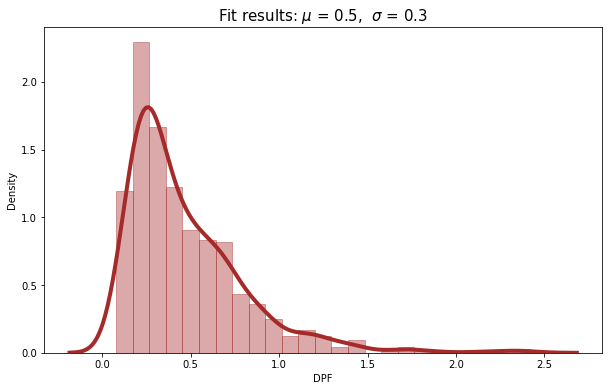

In [434]:
mu, std = norm.fit(DPF['DiabetesPedigreeFunction'])
plt.figure(figsize = [10, 6])
sns.distplot(DPF['DiabetesPedigreeFunction'], hist=True, kde=True, 
             bins=25, color = 'brown', 
             hist_kws={'edgecolor':'brown'},
             kde_kws={'linewidth': 4});
plt.title("Fit results: $\mu$ = %.1f,  $\sigma$ = %.1f" % (mu, std), size=15)
plt.xlabel("DPF")
plt.ylabel("Density");

### (g) Age

In [435]:
diabetes_extra.groupby("Outcome").agg({"Age":[np.mean, np.std, np.size]})

Age                
              mean        std size
Outcome                           
0        31.190000  11.667655  500
1        37.067164  10.968254  268

In [436]:
age_diabetes_mean = 37.067
age_diabetes_std = 10.968
age_diabetes_s = 268
age_diabetes_se = age_diabetes_mean / np.sqrt(age_diabetes_s)
age_diabetes_lcb = (age_diabetes_mean-1.96*age_diabetes_se)
age_diabetes_ucb = (age_diabetes_mean+1.96*age_diabetes_se)

age_nondiabetes_mean = 31.190
age_nondiabetes_std = 11.667
age_nondiabetes_s = 500
age_nondiabetes_se = age_nondiabetes_mean / np.sqrt(age_nondiabetes_s)
age_nondiabetes_lcb = (age_nondiabetes_mean-1.96*age_nondiabetes_se)
age_nondiabetes_ucb = (age_nondiabetes_mean+1.96*age_nondiabetes_se)

In [437]:
print("The LCB of Diabetic patients is: %.2f" % age_diabetes_lcb)
print("The UCB of Diabetic patients is: %.2f" % age_diabetes_ucb)
print()

print("The LCB of Non-Diabetic patients is: %.2f" % age_nondiabetes_lcb)
print("The UCB of Non-Diabetic patients is: %.2f" % age_nondiabetes_ucb)

The LCB of Diabetic patients is: 32.63
The UCB of Diabetic patients is: 41.50

The LCB of Non-Diabetic patients is: 28.46
The UCB of Non-Diabetic patients is: 33.92


In [438]:
age = diabetes_extra[['Age','Outcome']]

In [439]:
age['Outcome'].replace({1:'Diabetic', 0:'Nondiabetic'}, inplace=True)
age

,Age,Outcome
0,50,Diabetic
1,31,Nondiabetic
2,32,Diabetic
3,21,Nondiabetic
4,33,Diabetic
...,...,...
763,63,Nondiabetic
764,27,Nondiabetic
765,30,Nondiabetic
766,47,Diabetic


In [440]:
rp.ttest(group1 = age["Age"][age["Outcome"] == "Diabetic"], group1_name = "Diabetic",
         group2 = age["Age"][age["Outcome"] == "Nondiabetic"], group2_name = "NonDiabetic" )

(      Variable      N       Mean         SD        SE  95% Conf.   Interval
 0     Diabetic  268.0  37.067164  10.968254  0.669993  35.748023  38.386305
 1  NonDiabetic  500.0  31.190000  11.667655  0.521793  30.164817  32.215183
 2     combined  768.0  33.240885  11.760232  0.424361  32.407839  34.073932,
                        Independent t-test   results
 0  Difference (Diabetic - NonDiabetic) =     5.8772
 1                   Degrees of freedom =   766.0000
 2                                    t =     6.7927
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     0.5142
 7                            Hedge's g =     0.5137
 8                        Glass's delta =     0.5358
 9                          Pearson's r =     0.2384)

In [441]:
stats.ttest_ind(age["Age"][age["Outcome"] == "Diabetic"],
               age["Age"][age["Outcome"] == "Nondiabetic"])

Ttest_indResult(statistic=6.792688071649956, pvalue=2.2099754606654358e-11)

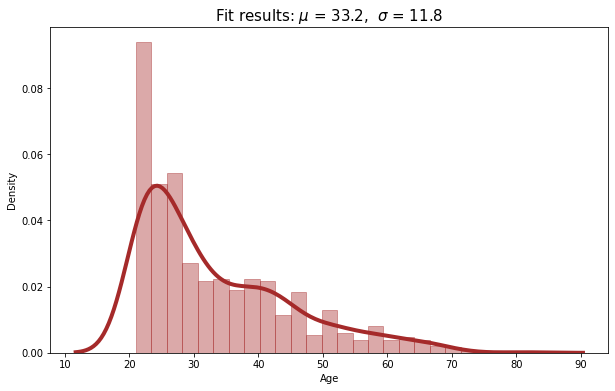

In [442]:
mu, std = norm.fit(age['Age'])
plt.figure(figsize = [10, 6])
sns.distplot(age['Age'], hist=True, kde=True, 
             bins=25, color = 'brown', 
             hist_kws={'edgecolor':'brown'},
             kde_kws={'linewidth': 4});
plt.title("Fit results: $\mu$ = %.1f,  $\sigma$ = %.1f" % (mu, std), size=15)
plt.xlabel("Age")
plt.ylabel("Density");

In [443]:
diabetes_extra.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,1,197.000000,70.0,45.000000,543.000000,30.5,0.158,53,1
525,1,87.000000,60.0,18.000000,79.799479,21.8,0.444,21,0
550,1,116.000000,70.0,28.000000,79.799479,27.4,0.204,21,0
182,1,120.894531,74.0,20.000000,23.000000,27.7,0.299,21,0
179,1,130.000000,82.0,20.536458,79.799479,39.1,0.956,37,1
677,0,93.000000,60.0,20.536458,79.799479,35.3,0.263,25,0
326,1,122.000000,64.0,32.000000,156.000000,35.1,0.692,30,1
558,1,103.000000,68.0,40.000000,79.799479,46.2,0.126,42,0
209,1,184.000000,84.0,33.000000,79.799479,35.5,0.355,41,1
283,1,161.000000,86.0,20.536458,79.799479,30.4,0.165,47,1


Logistics Regression using the diabetes_extra dataframe

In [444]:

Y = diabetes_extra.iloc[:, 8]
X = diabetes_extra.iloc[:, 0:7]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
log=LogisticRegression()
log.fit(X_train, Y_train)
y_predict = log.predict(X_test)
log_score = log.score(X_test, Y_test)

print(log_score)

0.8116883116883117


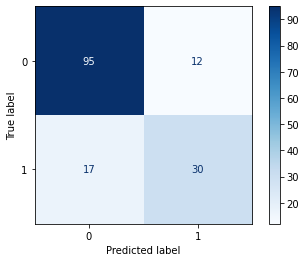

In [445]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues);

In [446]:
acc = metrics.accuracy_score(y_test, y_predict)
print("Accuracy: %.3f" % acc)

pre = metrics.precision_score(y_test, y_predict)
print("Precision: %.3f" % pre)

Accuracy: 0.812
Precision: 0.714


In [447]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       107
           1       0.71      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



More Precise Iteration with more specfic data.

In [448]:
diabetes_extra_new = diabetes_extra.copy()

In [449]:
diabetes_extra_new.drop(["Pregnancies", "BloodPressure","SkinThickness","Insulin"], axis=1, inplace=True)

In [450]:
diabetes_extra_new

,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,33.6,0.627,50,1
1,85.0,26.6,0.351,31,0
2,183.0,23.3,0.672,32,1
3,89.0,28.1,0.167,21,0
4,137.0,43.1,2.288,33,1
...,...,...,...,...,...
763,101.0,32.9,0.171,63,0
764,122.0,36.8,0.340,27,0
765,121.0,26.2,0.245,30,0
766,126.0,30.1,0.349,47,1


In [451]:
diabetes_extra_new.describe()

,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.681605,32.450805,0.471876,33.240885,0.348958
std,30.436016,6.875374,0.331329,11.760232,0.476951
min,44.000000,18.200000,0.078000,21.000000,0.000000
25%,99.750000,27.500000,0.243750,24.000000,0.000000
50%,117.000000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,67.100000,2.420000,81.000000,1.000000


In [452]:
Y = diabetes_extra_new.iloc[:, 4]
X = diabetes_extra_new.iloc[:, 0:5]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
log=LogisticRegression(solver='liblinear')
log.fit(X_train, Y_train)
y_predict = log.predict(X_test)
log_score = log.score(X_test, Y_test)

print(log_score)

1.0


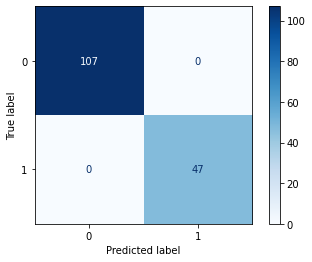

In [453]:
plot_confusion_matrix(log, X_test, Y_test, cmap=plt.cm.Blues);

In [454]:
acc = metrics.accuracy_score(y_test, y_predict)
print("Accuracy: %.3f" % acc)

pre = metrics.precision_score(y_test, y_predict)
print("Precision: %.3f" % pre)

Accuracy: 1.000
Precision: 1.000


In [455]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        47

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



In [459]:
writer = pd.ExcelWriter('Diabetes.xlsx')

In [457]:
diabetes_extra_new.to_excel(writer, sheet_name='Precise Data')

In [458]:
diabetes_extra.to_excel(writer, sheet_name='General Data')

In [371]:
writer.save()